In [ ]:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
import sys
sys.path.append('/home/aistudio')

	Datawhale第17期:零基础入门金融风控-贷款违约预测
    Task2 数据分析

	Task1：https://github.com/smclh/Datawhale-17---/blob/master/Task1%20%E8%B5%9B%E9%A2%98%E7%90%86%E8%A7%A3.ipynb

In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import gc
from reduce_memory import reduce_memory
import matplotlib.pyplot as plt
import seaborn as sns
from get_density_distributed import cat_feature_EDA
from get_density_distributed import con_feature_EDA

	读取数据，查看数据集大小。将train和testA合并，并做标记，将数据内存压缩，最后打印数据info，发现数据存在缺失情况。

In [9]:
train = pd.read_csv('data/data53148/train.csv')
testA = pd.read_csv('data/data53148/testA.csv')
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)
df = pd.concat([train.assign(is_train=1),testA.assign(is_train=0)])
df = df.apply(lambda x:reduce_memory(x))
df.info()

Train data shape: (800000, 47)
TestA data shape: (200000, 48)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 50 columns):
annualIncome          1000000 non-null float32
applicationType       1000000 non-null uint8
delinquency_2years    1000000 non-null float16
dti                   999700 non-null float16
earliesCreditLine     1000000 non-null object
employmentLength      941459 non-null object
employmentTitle       999999 non-null float32
ficoRangeHigh         1000000 non-null float16
ficoRangeLow          1000000 non-null float16
grade                 1000000 non-null object
homeOwnership         1000000 non-null uint8
id                    1000000 non-null uint32
initialListStatus     1000000 non-null uint8
installment           1000000 non-null float16
interestRate          1000000 non-null float16
isDefault             800000 non-null float16
is_train              1000000 non-null uint8
issueDate             1000000 non-null obje

In [10]:
#类别变量,从业务上理解
categorical_feature = ['term','grade','subGrade','employmentTitle','verificationStatus','purpose','postCode','regionCode',
                        'initialListStatus','applicationType','title']

In [11]:
#类别变量,从特征的类别数，完全可以将类别数过低的特征作为类别变量来处理
for col in df.columns:
    if df[col].nunique() < 30:
        print(col,df[col].nunique())

applicationType 2
employmentLength 11
grade 7
homeOwnership 6
initialListStatus 2
isDefault 2
is_train 2
n11 5
n12 5
n13 29
policyCode 1
pubRecBankruptcies 12
purpose 14
term 2
verificationStatus 3


	针对类别变量设计一个如下功能的函数（在train、test和整体数据集df中）
    1.探查特征的缺失情况
    2.探查特征nunique情况，是否有新的类出现，前X%中包含了多少类
    3.train和test数据分布的趋同情况
    4.探查特征的分布情况
    5.探查不同值下label的分布

train中grade的缺失率 0.0
test中grade的缺失率 0.0
df中grade的缺失率 0.0
train中grade的数量 7
test中grade的数量 7
df中grade的数量 7
test中新出现的grade的数量 0
50%的train,test,df包含的nun 1 1 1
60%的train,test,df包含的nun 2 2 2
70%的train,test,df包含的nun 2 2 2
80%的train,test,df包含的nun 3 3 3
90%的train,test,df包含的nun 4 4 4
train与test的趋同度为： 0.9999955191122121
train与test密度差的描述:
 count    6.000000
mean     0.000307
std      0.000140
min      0.000059
25%      0.000292
50%      0.000315
75%      0.000376
max      0.000474
Name: density_err, dtype: float64


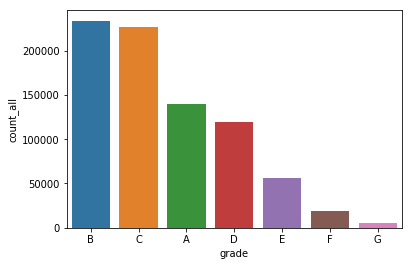

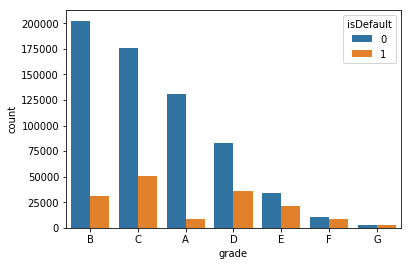

In [12]:
cat_feature_EDA(train,testA,df,'grade')

	像employmentTitle（就业职称）这个变量，testA中就出现了很多新类别；
    前X%的数据中train出现的类别多于test，表示train中的平均每一类的数量较少
    但是数据train与test的分布趋同度又很高，这是因为做了过滤处理，将频率低于p的类别过滤，最后只有3个，可以看到特征间类别的频率都很低。
    从图也能看出来，与总数据相比，每一类的占比实在太小了

train中employmentTitle的缺失率 1.25e-06
test中employmentTitle的缺失率 0.0
df中employmentTitle的缺失率 1e-06
train中employmentTitle的数量 248683
test中employmentTitle的数量 79282
df中employmentTitle的数量 298101
test中新出现的employmentTitle的数量 49418
50%的train,test,df包含的nun 2044 1953 2051
60%的train,test,df包含的nun 7434 6421 7515
70%的train,test,df包含的nun 27954 19282 28952
80%的train,test,df包含的nun 88684 39282 98102
90%的train,test,df包含的nun 168684 59282 198102
train与test的趋同度为： 0.9999985568414683
train与test密度差的描述:
 count    3.000000
mean     0.000347
std      0.000130
min      0.000209
25%      0.000287
50%      0.000365
75%      0.000416
max      0.000466
Name: density_err, dtype: float64


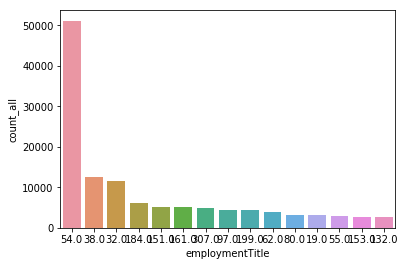

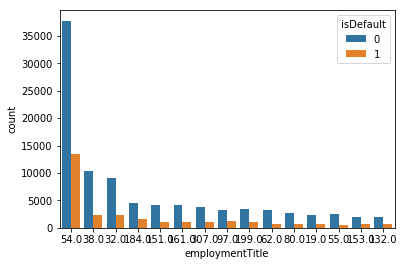

In [13]:
cat_feature_EDA(train,testA,df,'employmentTitle')

In [14]:
def con_fearure_EDA(train,test,feature):
    fig = plt.figure(figsize=(14,5))   
    ax1= fig.add_subplot(1,2,1)  
    sns.distplot(train[feature],label='train',ax=ax1)
    sns.distplot(test[feature],label='testA',ax=ax1)
    ax2= fig.add_subplot(1,2,2)  
    sns.distplot(train.loc[train.isDefault==1,feature],label='1',ax=ax2)
    sns.distplot(train.loc[train.isDefault==0,feature],label='0',ax=ax2)
    plt.legend()
    plt.show()

	对于连续型的数据探查数据train和test的分布情况，不同label下的分布情况

train中loanAmnt的缺失率 0.0
test中loanAmnt的缺失率 0.0
df中loanAmnt的缺失率 0.0


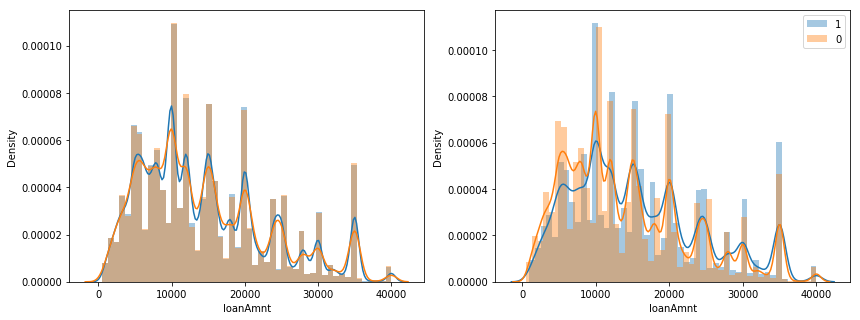

train中interestRate的缺失率 0.0
test中interestRate的缺失率 0.0
df中interestRate的缺失率 0.0


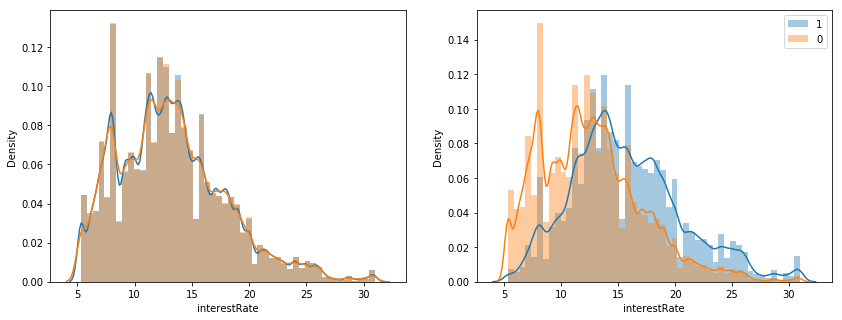

In [15]:
con_feature_EDA(train,testA,df,'loanAmnt')
con_feature_EDA(train,testA,df,'interestRate')

	简单的查看数据间的线性相关关系，发现有些特征间还是存在极强的相关性

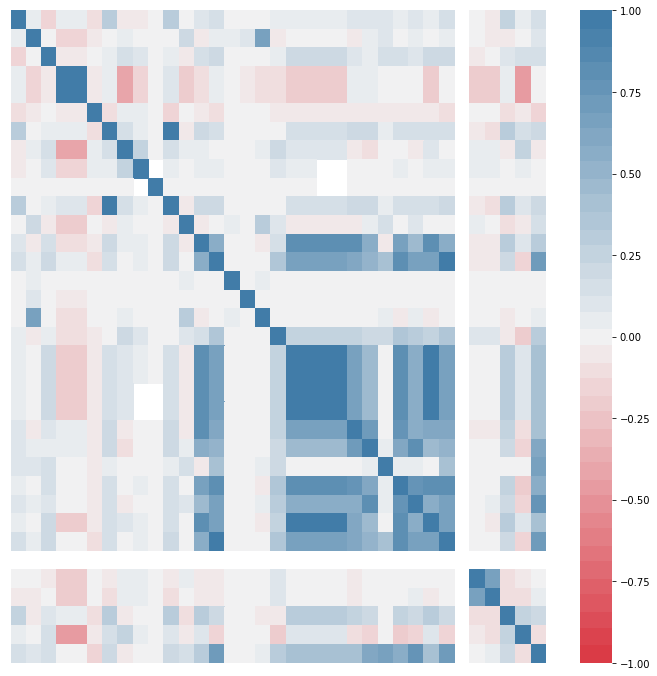

In [23]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.drop(categorical_feature+['id'],axis=1).corr(),yticklabels=False,xticklabels=False,center=0,vmin=-1, vmax=1,cmap=sns.diverging_palette(10, 240, n=39))